In [1]:
import pandas as pd

In [2]:
pcr_positive = pd.read_csv("COVID-19-jp/pcr_positive_daily.csv")
pcr_positive.tail(3)

,日付,PCR 検査陽性者数(単日),Unnamed: 2,Unnamed: 3
465,2021/4/25,4434,NaN,NaN
466,2021/4/26,3303,NaN,NaN
467,2021/4/27,4958,NaN,NaN


In [3]:
print(pcr_positive["日付"].isnull().sum())
print(pcr_positive["PCR 検査陽性者数(単日)"].isnull().sum())

0
0


In [4]:
del pcr_positive["Unnamed: 2"]
del pcr_positive["Unnamed: 3"]

In [5]:
pcr_positive["日付"] = pd.to_datetime(pcr_positive["日付"] )
pcr_positive["weekday"] = pcr_positive["日付"].dt.weekday
pcr_positive.head(2)

,日付,PCR 検査陽性者数(単日),weekday
0,2020-01-16,1,3
1,2020-01-17,0,4


In [6]:
weekday_jp = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
weekday_jp

,曜日
0,月
1,火
2,水
3,木
4,金
5,土
6,日


In [7]:
pcr_positive = pd.merge(pcr_positive, weekday_jp, left_on="weekday", right_index=True, how="left")
pcr_positive.head()

,日付,PCR 検査陽性者数(単日),weekday,曜日
0,2020-01-16,1,3,木
1,2020-01-17,0,4,金
2,2020-01-18,0,5,土
3,2020-01-19,0,6,日
4,2020-01-20,0,0,月


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#pcr_positive["日付"].min()
#pcr_positive["日付"].max()
#pd.to_datetime("1900/1/30")
#plt.xticks(np.arange(pcr_positive["日付"].min(), pcr_positive["日付"].max(), pd.to_datetime("1900/1/30")))


<BarContainer object of 468 artists>

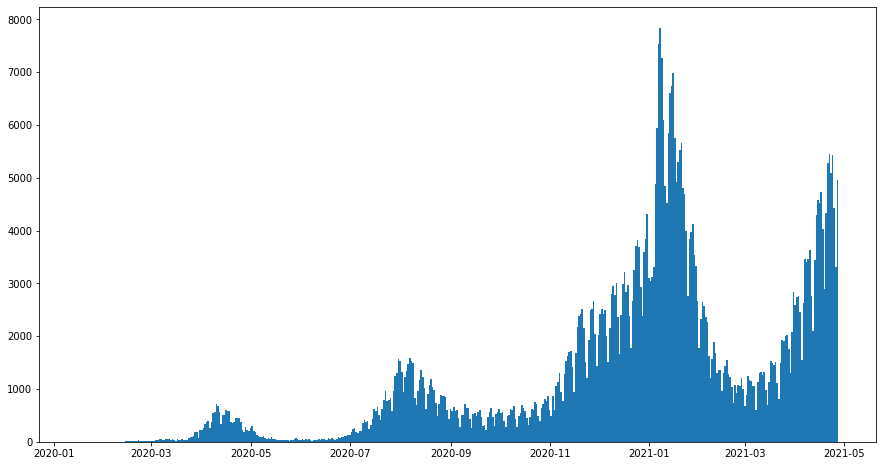

In [9]:
plt.figure(figsize=(15,8))
plt.bar(pcr_positive["日付"],pcr_positive["PCR 検査陽性者数(単日)"],width=1.0)

In [10]:
pcr_positive[["日付","PCR 検査陽性者数(単日)"]].tail(7)

,日付,PCR 検査陽性者数(単日)
461,2021-04-21,5280
462,2021-04-22,5452
463,2021-04-23,5094
464,2021-04-24,5433
465,2021-04-25,4434
466,2021-04-26,3303
467,2021-04-27,4958
